In [1]:
# file name: diabetes.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

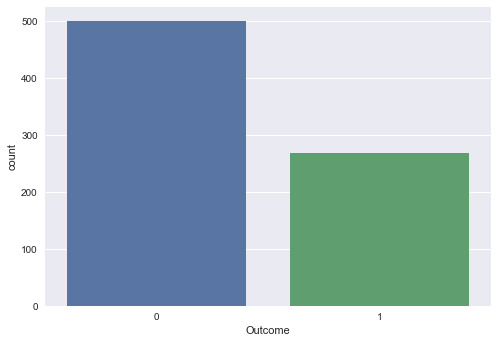

In [8]:
sns.countplot(x='Outcome', data=df)

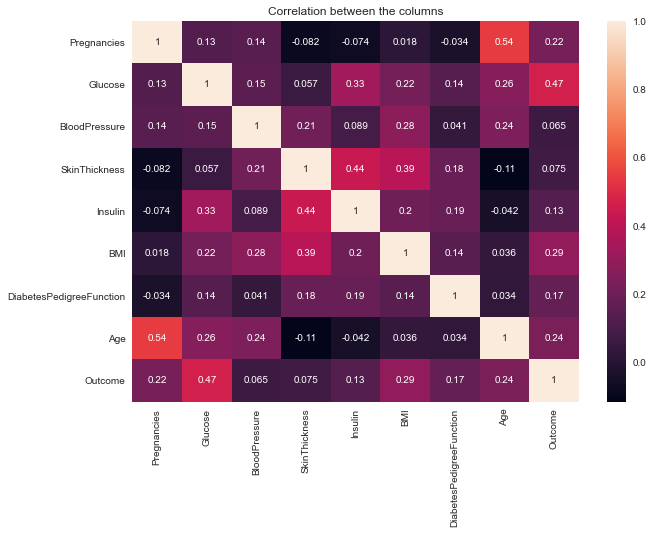

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [10]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:
X = df.drop(columns= 'Outcome', axis=1)
Y = df['Outcome']

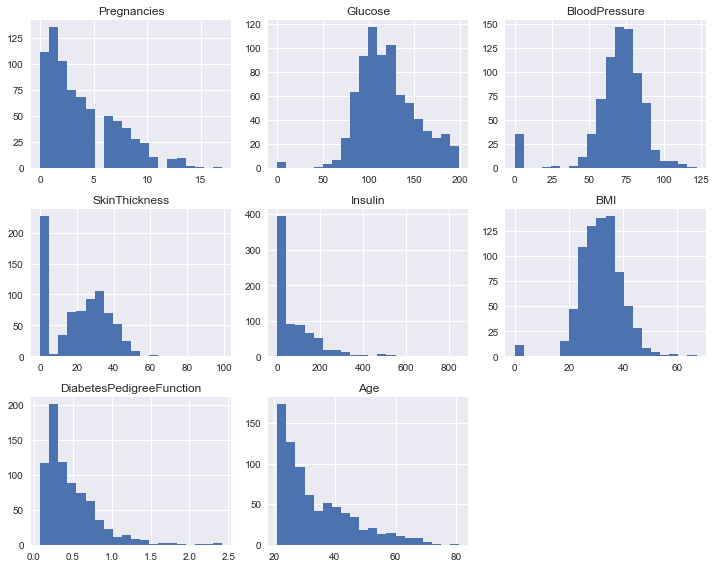

In [12]:
X.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
standardized_data = scaler.transform(X)

In [16]:
X = standardized_data
Y = df['Outcome']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, Y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 74.68%


In [20]:
print(classification_report(Y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        89
           1       0.75      0.60      0.67        65

    accuracy                           0.75       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.75      0.75      0.74       154



In [21]:
svmModel = svm.SVC(kernel='linear')
svmModel.fit(X_train, Y_train)
svmModel_pred = svmModel.predict(X_test)
svmModel_acc = accuracy_score(svmModel_pred, Y_test)
print("Test Accuracy: {:.2f}%".format(svmModel_acc*100))

Test Accuracy: 75.32%


In [22]:
print(classification_report(Y_test, svmModel_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        89
           1       0.75      0.62      0.68        65

    accuracy                           0.75       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.75      0.75      0.75       154



In [23]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
scalar_data = scaler.transform(input_data_reshaped)

In [24]:
prediction = svmModel.predict(scalar_data)
print(prediction)

[1]
